## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## 2. Import Data

In [2]:
university_data=pd.read_csv('Universities.csv')
university_data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


## 3. Initial Analysis

In [3]:
university_data.shape

(25, 7)

In [4]:
university_data.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [5]:
university_data.dtypes

Univ        object
SAT          int64
Top10        int64
Accept       int64
SFRatio      int64
Expenses     int64
GradRate     int64
dtype: object

In [6]:
university_data.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


## 4. Data Pre-Processing

In [7]:
std_scalar=StandardScaler()

In [8]:
university_data.iloc[:,1:]=std_scalar.fit_transform(university_data.iloc[:,1:])
university_data.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,CalTech,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,CMU,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,Columbia,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,Cornell,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


## 5. Data Building

### * Finding Optimum Value for K using Elbow Method

In [9]:
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i, random_state=10)
    k_means.fit(university_data.iloc[:,1:])
    wcss.append(k_means.inertia_)

In [10]:
print(wcss)

[149.99999999999997, 64.1452839501027, 44.531761731450956, 33.654341806512235, 26.45525084643788, 22.672206496052258, 18.84436856089495, 16.057428074500915, 13.342119002093037, 10.959526184170146]


#### Elbow Plot

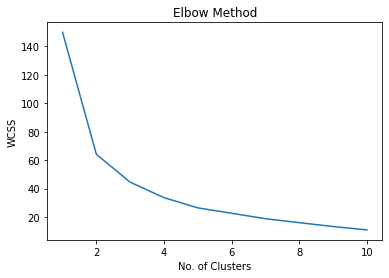

In [11]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

### Building Model with k=4

In [12]:
k_means=KMeans(n_clusters=4, random_state=10)
k_means.fit(university_data.iloc[:,1:])

KMeans(n_clusters=4, random_state=10)

In [13]:
clusters=k_means.labels_
print(clusters)

[2 3 1 2 1 2 2 1 2 3 2 1 1 0 2 0 2 0 1 1 1 1 1 0 2]


In [14]:
university_data['Clusters']=clusters
university_data

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303,2
1,CalTech,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524,3
2,CMU,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,1
3,Columbia,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229,2
4,Cornell,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587,1
5,Dartmouth,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982,2
6,Duke,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982,2
7,Georgetown,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945,1
8,Harvard,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339,2
9,JohnsHopkins,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550,3


In [15]:
# Centroids choosen from the model
print(k_means.cluster_centers_)

[[-1.93029211 -1.98148647  1.59348244  1.63857398 -1.23359906 -1.68680366]
 [-0.12658888  0.06407139  0.2224667   0.04516743 -0.38064332  0.02028221]
 [ 0.80273428  0.68086062 -0.90136381 -0.43159988  0.44062556  0.79526289]
 [ 0.88122441  0.5787432  -0.24316128 -1.56078563  2.38759968 -0.3064867 ]]


In [16]:
university_data.groupby(by='Clusters').agg(['mean']).reset_index()

,Clusters,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,-1.930292,-1.981486,1.593482,1.638574,-1.233599,-1.686804
1,1,-0.126589,0.064071,0.222467,0.045167,-0.380643,0.020282
2,2,0.802734,0.680861,-0.901364,-0.431600,0.440626,0.795263
3,3,0.881224,0.578743,-0.243161,-1.560786,2.387600,-0.306487
